In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [5]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [7]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


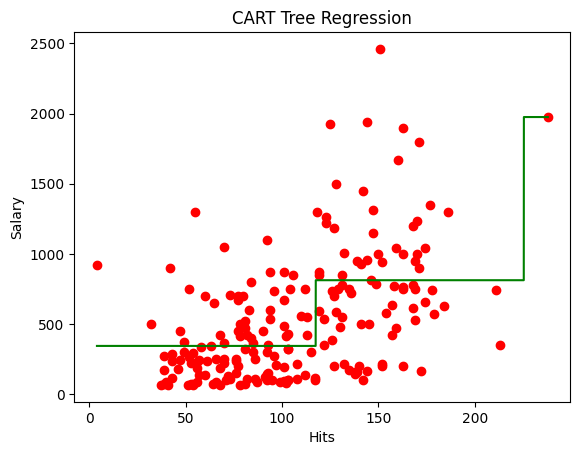

In [8]:
X_grid = np.arange(min(np.ravel(X_train)), max(np.ravel(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="green")
plt.title('CART Tree Regression')
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

In [9]:
#Prediction

In [10]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

In [11]:
#All Variables

In [12]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

463.1624998948353

In [15]:
#Model Tuning

In [16]:
cart_model = DecisionTreeRegressor(max_depth=3)
cart_model.fit(X_train, y_train)
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

435.3876314155003

In [17]:
?cart_model

In [18]:
cart_params = {
    "max_depth": [2, 3, 4, 5, 10, 20],
    "min_samples_split": [2, 10, 5, 30, 50, 10]
}


In [19]:
cart_model=DecisionTreeRegressor()
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10)
cart_cv_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 20],
                         'min_samples_split': [2, 10, 5, 30, 50, 10]})

In [21]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [22]:
cart_model=DecisionTreeRegressor(max_depth=10,min_samples_split=50)
cart_model.fit(X_train, y_train)
y_pred=cart_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511435